In [3]:
from PIL import Image
import numpy as np
import math as m 
import matplotlib.pyplot as plt

img1  = './IMG1.png'
img2  = './IMG2.png'

A = np.array ([
    [29 , 124 , 1 , 0] , 
    [124 , -29 , 0 , 1] , 
    [157 , 372 , 1 , 0] ,
    [372 , -157 , 0 , 1]

])

B = np.array([93 , 248 , 328 , 399])


x = np.linalg.solve(A , B)
a , b , c , d = x[0] , x[1] , x[2] , x[3]
a , b , c , d

(0.8669884963023828, 0.5001027115858668, 5.844597370583405, 154.99640509449466)

In [4]:
# yay we got a , b ,c , d

theta =  np.arcsin(b)
theta_deg = np.rad2deg(theta)
theta_deg

30.00679557650733

In [6]:
def bilinear_interpolation(input, x, y):
    x_ = m.floor(x)
    y_ = m.floor(y)
    a = x - x_
    b = y - y_
    h, w = input.shape

    if 0 <= x_ < h - 1 and 0 <= y_ < w - 1:
        It_1 = (1 - a) * (1 - b) * input[x_, y_]
        It_2 = (1 - a) * b * input[x_, y_ + 1]
        It_3 = a * b * input[x_ + 1, y_ + 1]
        It_4 = a * (1 - b) * input[x_ + 1, y_]

        return It_1 + It_2 + It_3 + It_4
    else:
        return 255

In [12]:
C = np.array([
    [0.867 , 0.5 , 5.8] ,
    [-0.5 , 0.867 , 155] ,
    [0 , 0 , 1]
  ])

inv_mat = np.linalg.inv(C)

target = np.zeros((517, 598))
h , w = target.shape
input = np.array(Image.open(img1))
input2 = np.array(Image.open(img2))
for i in range(h):
        for j in range(w):
            
            image_mat = np.array([i  , j  , 1])
            target_mat = image_mat.reshape((3,1))
            source_mat = np.matmul(inv_mat , target_mat) 
            x = source_mat[0,0] 
            y = source_mat[1 , 0] 
            target[i, j] = bilinear_interpolation (input , x , y )

print(target[255,255])
# plt.imshow(target , cmap = 'gray')
# source = 

236.63270792820447


In [8]:
inv_mat

array([[   0.86553811,   -0.49915692,   72.3492022 ],
       [   0.49915692,    0.86553811, -137.05351661],
       [   0.        ,    0.        ,    1.        ]])

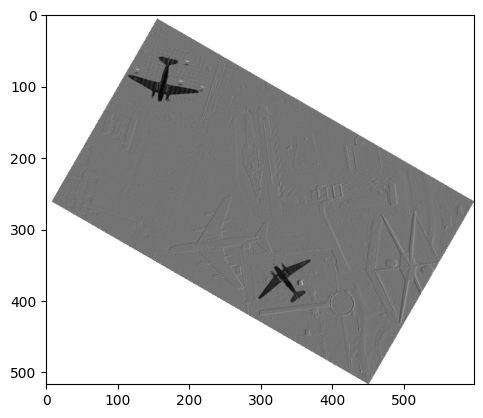

In [23]:
# plt.imshow(input2 ,cmap = 'gray')
h , w = input2.shape
h , w
D = target - input2
plt.imshow(D ,cmap = 'gray')

In [78]:

def bilinear_interpolation(input, x, y):
    x_ = m.floor(x)
    y_ = m.floor(y)
    a = x - x_
    b = y - y_
    h, w = input.shape

    if 0 <= x_ < h - 1 and 0 <= y_ < w - 1:
        It_1 = (1 - a) * (1 - b) * input[x_, y_]
        It_2 = (1 - a) * b * input[x_, y_ + 1]
        It_3 = a * b * input[x_ + 1, y_ + 1]
        It_4 = a * (1 - b) * input[x_ + 1, y_]

        return It_1 + It_2 + It_3 + It_4
    else:
        return 255
    
def show_image ( input , output , output_name ):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(input, cmap='gray')
    plt.title('Source Image')
 
    plt.subplot(1, 2, 2)
    plt.imshow(output, cmap='gray')
    plt.title('Output Image')

    plt.savefig(f'./{output_name}.png')

def rotation_trans(input , theta , tx , ty):
    h, w = input.shape
    target = np.zeros((517,598))

    cos = np.cos(np.radians(theta))
    sin = np.sin(np.radians(theta))
    target = np.zeros_like(input)

    rotation_mat = np.array([[cos , sin , tx],
                            [-sin , cos , ty],
                            [0 , 0 , 1 ]])
    inv_mat = np.linalg.inv(rotation_mat)

    for i in range(h):
        for j in range(w):
            
            image_mat = np.array([i  , j  , 1])
            target_mat = image_mat.reshape((3,1))
            source_mat = np.matmul(inv_mat , target_mat)
            x = source_mat[0,0] 
            y = source_mat[1 , 0] 
            target[i, j] = bilinear_interpolation (input , x , y )
    return target

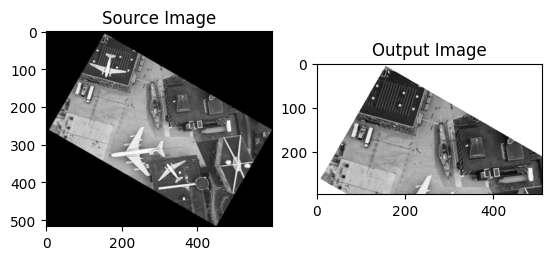

In [79]:
image1 = np.array(Image.open(img1))
image2 = np.array(Image.open(img2))

output = rotation_trans(image1 , 30 , c , d)
# output_2 = translation(output , c , d)

show_image(image2,output, 'translated_image')


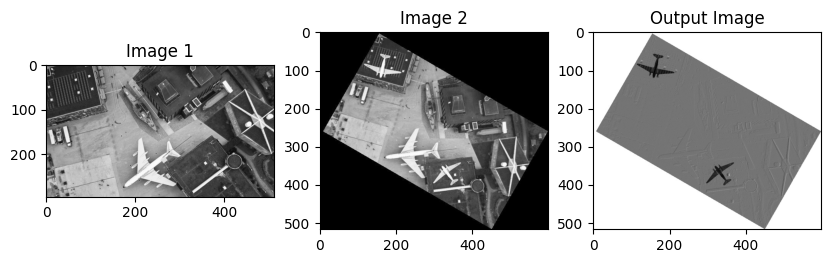

In [17]:
# to create function
'''

EE5175 - Lab 2 
Date : 15/02/2024
Command to run : python3 assignment_2.py

'''

from PIL import Image
import numpy as np
import math as m 
import matplotlib.pyplot as plt

img1  = np.array(Image.open('./IMG1.png'))  
img2  = np.array(Image.open('./IMG2.png'))

A = np.array ([
     
    [29 , 124 , 1 , 0] , 
    [124 , -29 , 0 , 1] ,     # This is the matrix created to solve for the values        
    [157 , 372 , 1 , 0] ,     # of rotation (sin(theta) , cos(theta)), translation(tx and ty)
    [372 , -157 , 0 , 1]

])

B = np.array([93 , 248 , 328 , 399])  

x = np.linalg.solve(A , B)

a , b , c , d = x[0] , x[1] , x[2] , x[3]   # values of sin , cos , tx and ty 
                                            # given to a , b , c and d respectively

def bilinear_interpolation(input, x, y):
    x_ = m.floor(x)
    y_ = m.floor(y)
    a = x - x_
    b = y - y_
    h, w = input.shape

    if 0 <= x_ < h - 1 and 0 <= y_ < w - 1:
        It_1 = (1 - a) * (1 - b) * input[x_, y_]
        It_2 = (1 - a) * b * input[x_, y_ + 1]
        It_3 = a * b * input[x_ + 1, y_ + 1]
        It_4 = a * (1 - b) * input[x_ + 1, y_]

        return It_1 + It_2 + It_3 + It_4
    else:
        return 255


# Here onwards we are trying to find source coordinate x and y 
# from the matrix C . 
    
def occlusion(cos , sin , tx , ty , input1 , input2 ):
    
    C = np.array([
    [cos , sin , tx] ,                  # matrix that has both rotation and translation                                  
    [-sin , cos , ty] ,                 # i.e  [R | T] created by using the values we found earlier
    [0 , 0 , 1]
  ])
    inv_mat = np.linalg.inv(C)
    h , w = input2.shape

    target = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            
            image_mat = np.array([i  , j  , 1])
            target_mat = image_mat.reshape((3,1))
            source_mat = np.matmul(inv_mat , target_mat) 
            x = source_mat[0, 0] 
            y = source_mat[1 , 0] 
            target[i, j] = bilinear_interpolation (input1 , x , y )


    D = target - img2
    return D


if __name__ == "__main__":

    img1  = np.array(Image.open('./IMG1.png'))  
    img2  = np.array(Image.open('./IMG2.png'))
    output = occlusion(a , b, c , d , img1 , img2)


plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Image 1')

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Image 2')

plt.subplot(1, 3, 3)
plt.imshow(output, cmap='gray')  
plt.title('Output Image')

plt.savefig('output.png')
plt.imsave('occlusion.png', output , cmap='gray')